Data Set Up

In [ ]:
# install dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Scikit-learn modules for modeling and validation
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [ ]:
# change directory to google drive
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import os
print(os.getcwd())

In [ ]:
print(os.listdir('/content/drive/MyDrive/'))

In [ ]:
data = pd.read_csv("BASKETBALL_DATA.csv", encoding="latin1")

data.head()

# print column names to see any hidden characters
print([repr(col) for col in data.columns])

data = data.rename(columns={'ÿmonth': 'ymonth'})

# Remove extra whitespace from the column names
data.columns = data.columns.str.strip()

# Check the cleaned column names again
print([repr(col) for col in data.columns])

data.head()


["'ï»¿month'", "'day'", "'player'", "'year_born'", "'years_played'", "'games_played'", "'field_goals'", "'field_goal_attempts'", "'3point_field_goals'", "'3point_field_goal_attempts'", "'free_throws'", "'free_throw_attempts'", "'offensive_rebounds'", "'steals'", "'blocks'", "'turnovers'", "'personal_fouls'", "'win_shares'", "'field_goal_percent'", "'3point_field_goal_percent'", "'free_throw_percent'", "'minutes_played_per_game'", "'points_per_game'", "'total_rebounds_per_game'", "'assists_per_game'", "'points'", "'minutes_played'", "'total_rebounds'", "'assists'", "'age'", "'city'", "'region'", "'position'", "'college'", "'team_recent'", "'dunkattempts'", "'championship'", "'sex'", "'status'", "'height_default'", "'height_cm'", "'weight_kg'", "'weight_lb'"]
["'ï»¿month'", "'day'", "'player'", "'year_born'", "'years_played'", "'games_played'", "'field_goals'", "'field_goal_attempts'", "'3point_field_goals'", "'3point_field_goal_attempts'", "'free_throws'", "'free_throw_attempts'", "'off

,ï»¿month,day,player,year_born,years_played,games_played,field_goals,field_goal_attempts,3point_field_goals,3point_field_goal_attempts,...,college,team_recent,dunkattempts,championship,sex,status,height_default,height_cm,weight_kg,weight_lb
0,January,1.0,Dan Anderson,1951.0,2.0,95.0,135.0,286.0,NaN,NaN,...,USC,Portland Trail Blazers,NaN,no,male,Alive,6-2,188.0,83.0,185.0
1,January,1.0,Dan Anderson,1951.0,2.0,95.0,135.0,286.0,NaN,NaN,...,USC,Portland Trail Blazers,NaN,no,male,Alive,6-2,188.0,83.0,185.0
2,January,1.0,Chris Anstey,1975.0,3.0,155.0,303.0,734.0,4.0,29.0,...,NaN,Dallas Mavericks,45.0,no,male,Alive,7-0,213.0,112.0,249.0
3,January,1.0,Kobe Brown,2000.0,2.0,59.0,58.0,134.0,18.0,63.0,...,Missouri,Los Angeles Clippers,13.0,no,male,Alive,6-7,201.0,113.0,250.0
4,January,1.0,Jim Browne,1930.0,2.0,35.0,18.0,50.0,NaN,NaN,...,NaN,Denver Nuggets,NaN,no,male,Dead,6-10,208.0,106.0,235.0


In [ ]:
cols = ['points_per_game', 'field_goal_percent', '3point_field_goal_attempts',
        'minutes_played_per_game', 'turnovers']

# Subset to just the needed columns and drop rows with missing values in those columns
data_vol_eff = data[cols].dropna()

# Filter out rows where minutes_played_per_game is 10 or less
data_vol_eff = data_vol_eff[data_vol_eff['minutes_played_per_game'] > 10]

print(data_vol_eff.head())
print(data_vol_eff.describe())



   points_per_game  field_goal_percent  3point_field_goal_attempts  \
2              5.2               0.413                        29.0   
6              2.4               0.367                         0.0   
7              8.0               0.447                        55.0   
8              8.0               0.447                        55.0   
9             13.8               0.524                         6.0   

   minutes_played_per_game  turnovers  
2                     13.9      147.0  
6                     10.9       14.0  
7                     21.1      528.0  
8                     21.1      528.0  
9                     21.4      261.0  
       points_per_game  field_goal_percent  3point_field_goal_attempts  \
count      4918.000000         4918.000000                 4918.000000   
mean          8.385441            0.443841                  629.610817   
std           4.715773            0.061337                 1062.002691   
min           0.000000            0.000000 

# Scatter plots to visualize points_per_game and each predictor variable

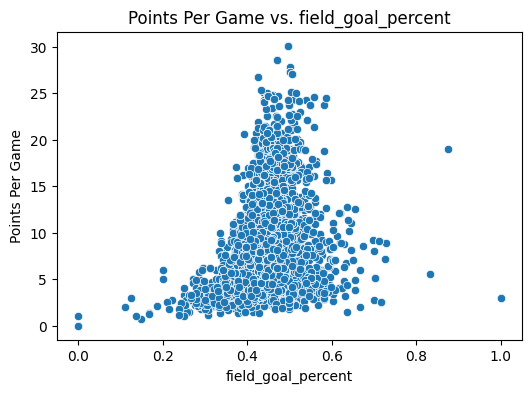

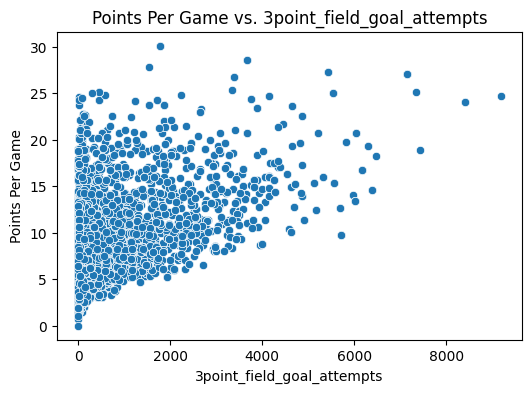

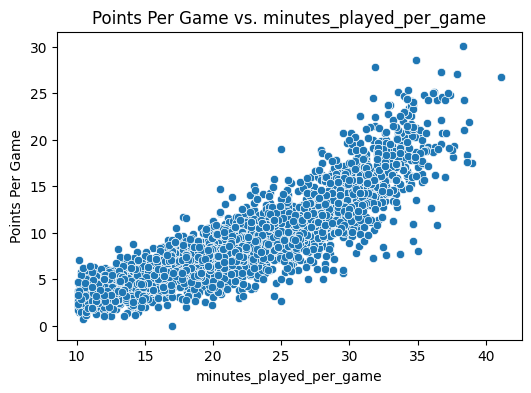

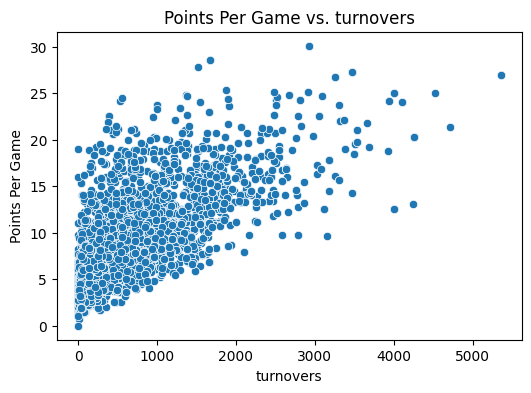

In [ ]:
# List the predictor features
predictors = ['field_goal_percent', '3point_field_goal_attempts',
              'minutes_played_per_game', 'turnovers']

# Create scatter plots for each predictor against points per game
for feature in predictors:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=data_vol_eff[feature], y=data_vol_eff['points_per_game'])
    plt.xlabel(feature)
    plt.ylabel('Points Per Game')
    plt.title(f'Points Per Game vs. {feature}')
    plt.show()


# Multiple Linear Regression

Regression coefficient interpretation, one unit increase of standard deviation will yield an increase of a 3.517612 minutes played per game... same applies to all other variables.

In [ ]:
X = data_vol_eff[predictors]
Y = data_vol_eff['points_per_game']

#standardize the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#fit the linear regression model
vol_eff_model = LinearRegression()
vol_eff_model.fit(X_scaled, Y)

coef_df = pd.DataFrame({
    'Feature': predictors,
    'Coefficient': vol_eff_model.coef_
})
print(coef_df)
print("Intercept:", vol_eff_model.intercept_)


                      Feature  Coefficient
0          field_goal_percent     0.392371
1  3point_field_goal_attempts     0.342463
2     minutes_played_per_game     3.517612
3                   turnovers     0.561662
Intercept: 8.38544123627491


# Model Evaluation

In [ ]:
# Evaluate the model using 8-fold cross-validation (MSE)
cv_scores = -cross_val_score(vol_eff_model, X_scaled, Y, scoring="neg_mean_squared_error", cv=8)
print("Linear Regression CV MSE:", np.mean(cv_scores))

# Print the overall R² score for the model on the full dataset
r2_score = vol_eff_model.score(X_scaled, Y)
print("Linear Regression R² Score:", r2_score)


Linear Regression CV MSE: 4.207734407257842
Linear Regression R² Score: 0.81163047751925


# Visualizations of Predictions

Coefficient Plot:
Illustrates the contribution of each predictor to the model.

Actual vs. Predicted Plot:
Visualizes the overall predictive performance.

Residual Plot:
Assesses the distribution of errors to check for patterns or anomalies.

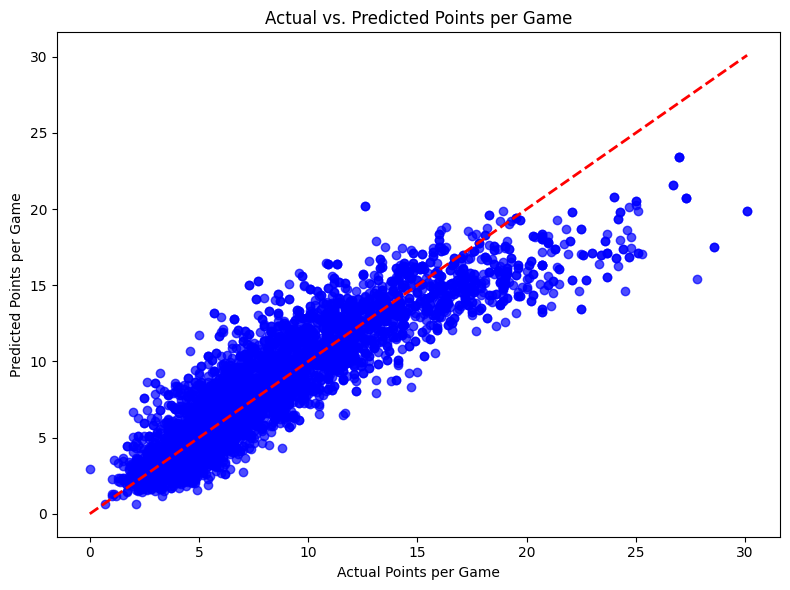

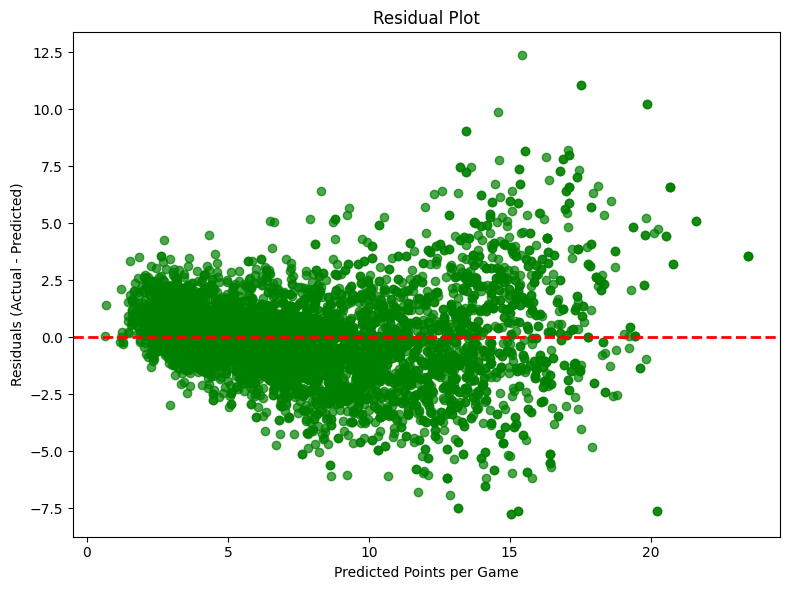

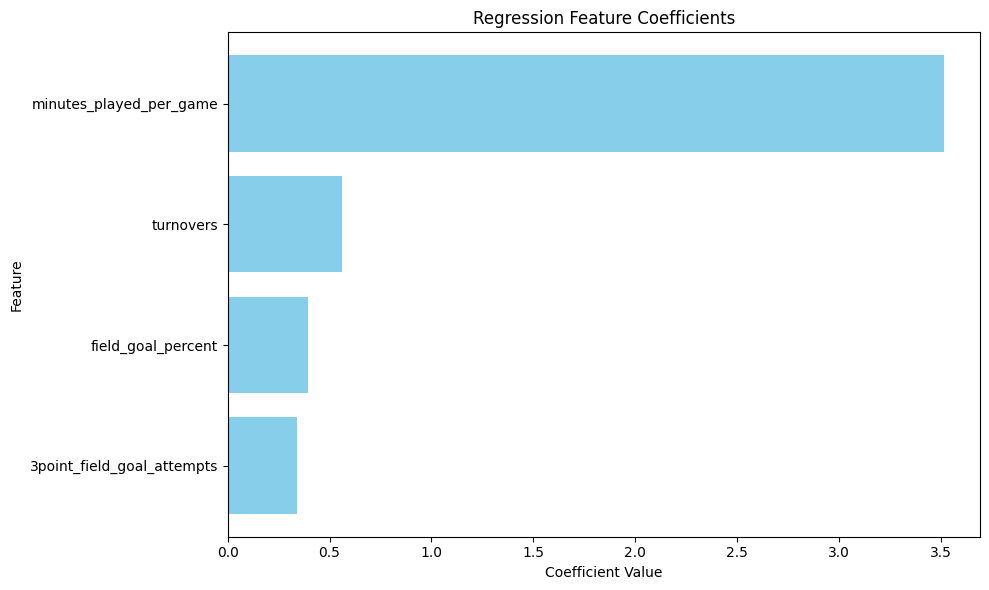

In [ ]:
# Generate predictions using the trained model and standardized predictors
Y_pred = vol_eff_model.predict(X_scaled)

# 1. Actual vs. Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(Y, Y_pred, alpha=0.7, color='blue')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Points per Game')
plt.ylabel('Predicted Points per Game')
plt.title('Actual vs. Predicted Points per Game')
plt.tight_layout()
plt.show()

# 2. Residual Plot
residuals = Y - Y_pred
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, residuals, alpha=0.7, color='green')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Points per Game')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

# 3. Coefficient Plot
# Get coefficients from your regression model
coefs = vol_eff_model.coef_
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefs
})
coef_df['AbsCoefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.axvline(x=0, color='gray', linestyle='--')
plt.xlabel('Coefficient Value')
plt.title('Regression Feature Coefficients')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Ensure the largest coefficient is at the top
plt.tight_layout()
plt.show()


The plot shows the actual vs. predicted points per game for our regression model. The red dashed line represents perfect prediction. Most of the predicted values are close with the actual values, indicating that our model is  good at estimating a player's scoring performance. The slight spread at higher scoring values  implies that while the model performs generally well overall, it’s not as accurate for outliers, which is expected in real-world sports data.